<h1 style="color:violet;">Analalysing Birth and Death</h1>

<h3 style="color:violet;"><em>Importing the Needed libraries</em></h3>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  matplotlib.dates  as mdates
import plotly.express as px
from scipy.stats import stats

<h3 style="color:violet;">Loading the data</h3>

In [7]:
df_yearly = pd.read_csv("data/annual_deaths_by_clinic.csv")
df_monthly = pd.read_csv("data/monthly_deaths.csv")

<h3 style="color:violet;">Exploration</h3>

In [8]:
df_yearly.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [9]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 516.0+ bytes


In [10]:
df_monthly.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [11]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [12]:
df_monthly.duplicated().sum()

0

In [13]:
df_yearly.duplicated().sum()

0

<h4>Average Birth per Month</h4>

In [14]:
df_monthly['date'] = pd.to_datetime(df_monthly['date'])

In [16]:
df_monthly['births'].mean()

267.0

<h4>Average Death per Month</h4>

In [17]:
df_monthly['deaths'].mean()

22.46938775510204

<h4>Percentage of death at child birth</h4>

In [20]:
(df_yearly['deaths'].sum()/df_yearly['births'].sum()) * 100

7.083762852536147

<h4>Trend of Birth and Death over time</h4>

In [29]:
year = mdates.YearLocator()
year_fmt = mdates.DateFormatter("%Y")
month = mdates.MonthLocator()

Text(0, 0.5, 'Deaths')

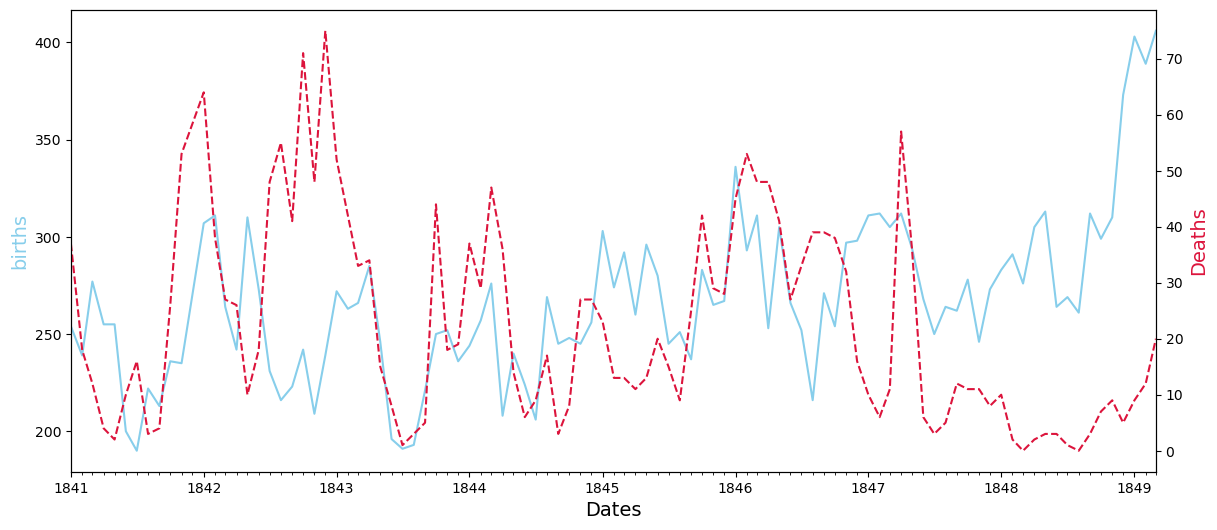

In [31]:
plt.figure(figsize=(14, 6))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(df_monthly['date'], df_monthly['births'], c="skyblue")
ax2.plot(df_monthly['date'], df_monthly['deaths'], c="crimson", linestyle='--')

ax1.set_xlim(df_monthly['date'].min(), df_monthly['date'].max())
ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(month)


ax1.set_xlabel("Dates", fontsize=14)
ax1.set_ylabel("births", fontsize=14, color="skyblue")
ax2.set_ylabel("Deaths", fontsize=14, color="crimson")

In [34]:
line = px.line(df_yearly, 
               x='year', 
               y='births',
               color='clinic',
               title='Total Yearly Births by Clinic')
 
line.show()

In [35]:
line = px.line(df_yearly, 
               x='year', 
               y='deaths',
               color='clinic',
               title='Total Yearly Deaths by Clinic')
 
line.show()

In [36]:
df_yearly['pct_deaths'] = df_yearly.deaths / df_yearly.births

In [37]:
clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100

In [38]:
avg_c1

9.924159265542361

In [39]:
clinic_2 = df_yearly[df_yearly.clinic == 'clinic 2']
avg_c2 = clinic_2.deaths.sum() / clinic_2.births.sum() * 100

In [40]:
avg_c2

3.8839862852003826

In [41]:
line = px.line(df_yearly, 
               x='year', 
               y='pct_deaths',
               color='clinic',
               title='Proportion of Yearly Deaths by Clinic')
 
line.show()

In [42]:
df_monthly['pct_deaths'] = df_monthly.deaths/df_monthly.births

In [44]:
handwashing_start = pd.to_datetime('1946-06')

In [45]:
before_washing = df_monthly[df_monthly.date < handwashing_start]
after_washing = df_monthly[df_monthly.date >= handwashing_start]

In [46]:
bw_rate = before_washing.deaths.sum() / before_washing.births.sum() * 100
aw_rate = after_washing.deaths.sum() / after_washing.births.sum() * 100

C:\Users\user\AppData\Local\Temp\ipykernel_14412\3072717442.py:2: RuntimeWarning:

invalid value encountered in scalar divide



In [47]:
roll_df = before_washing.set_index('date')
roll_df = roll_df.rolling(window=6).mean()

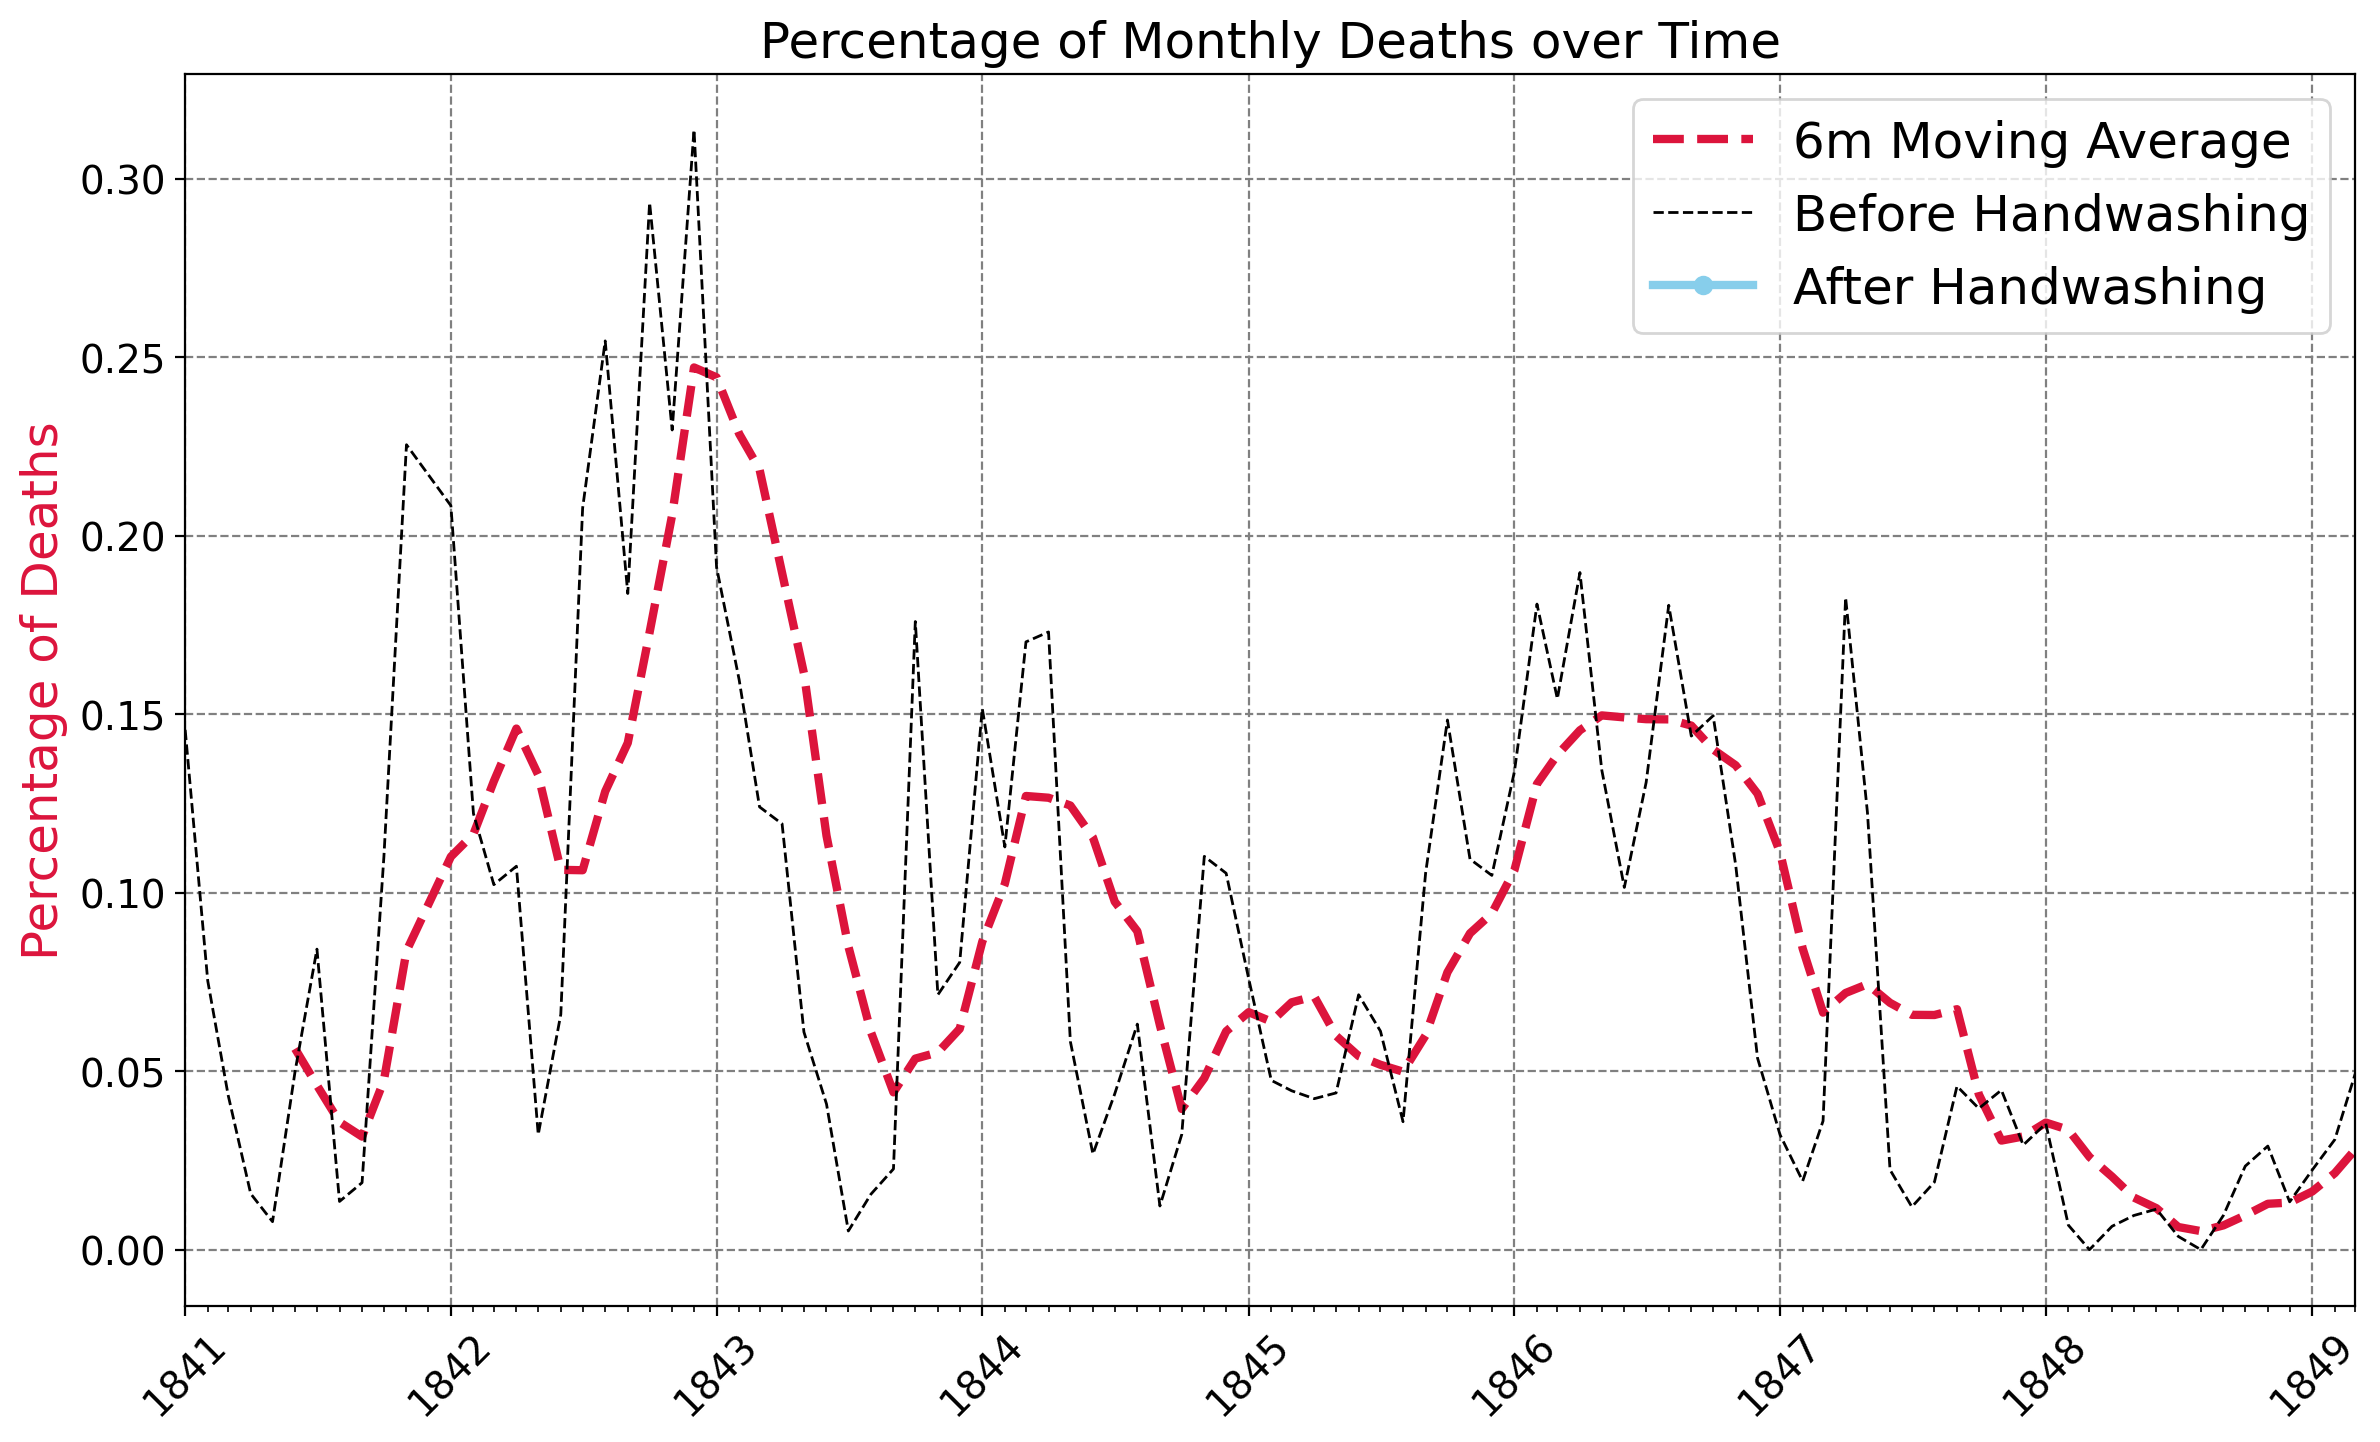

In [49]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)
 
ax = plt.gca()
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_fmt)
ax.xaxis.set_minor_locator(month)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
 
plt.grid(color='grey', linestyle='--')
 
ma_line, = plt.plot(roll_df.index, 
                    roll_df.pct_deaths, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(before_washing.date, 
                    before_washing.pct_deaths,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing')
aw_line, = plt.plot(after_washing.date, 
                    after_washing.pct_deaths, 
                    color='skyblue', 
                    linewidth=3, 
                    marker='o',
                    label='After Handwashing')
 
plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)
 
plt.show()

In [50]:
avg_prob_before = before_washing.pct_deaths.mean() * 100

In [51]:
avg_prob_after = after_washing.pct_deaths.mean() * 100

In [52]:
mean_diff = avg_prob_before - avg_prob_after

In [53]:
times = avg_prob_before / avg_prob_after

In [54]:
df_monthly['washing_hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')

In [55]:
box = px.box(df_monthly, 
             x='washing_hands', 
             y='pct_deaths',
             color='washing_hands',
             title='How Have the Stats Changed with Handwashing?')
 
box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)
 
box.show()

In [56]:
hist = px.histogram(df_monthly, 
                   x='pct_deaths', 
                   color='washing_hands',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)
 
hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)
 
hist.show()

c:\Users\user\project_directory\pythonProj\Analytics\nevn\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



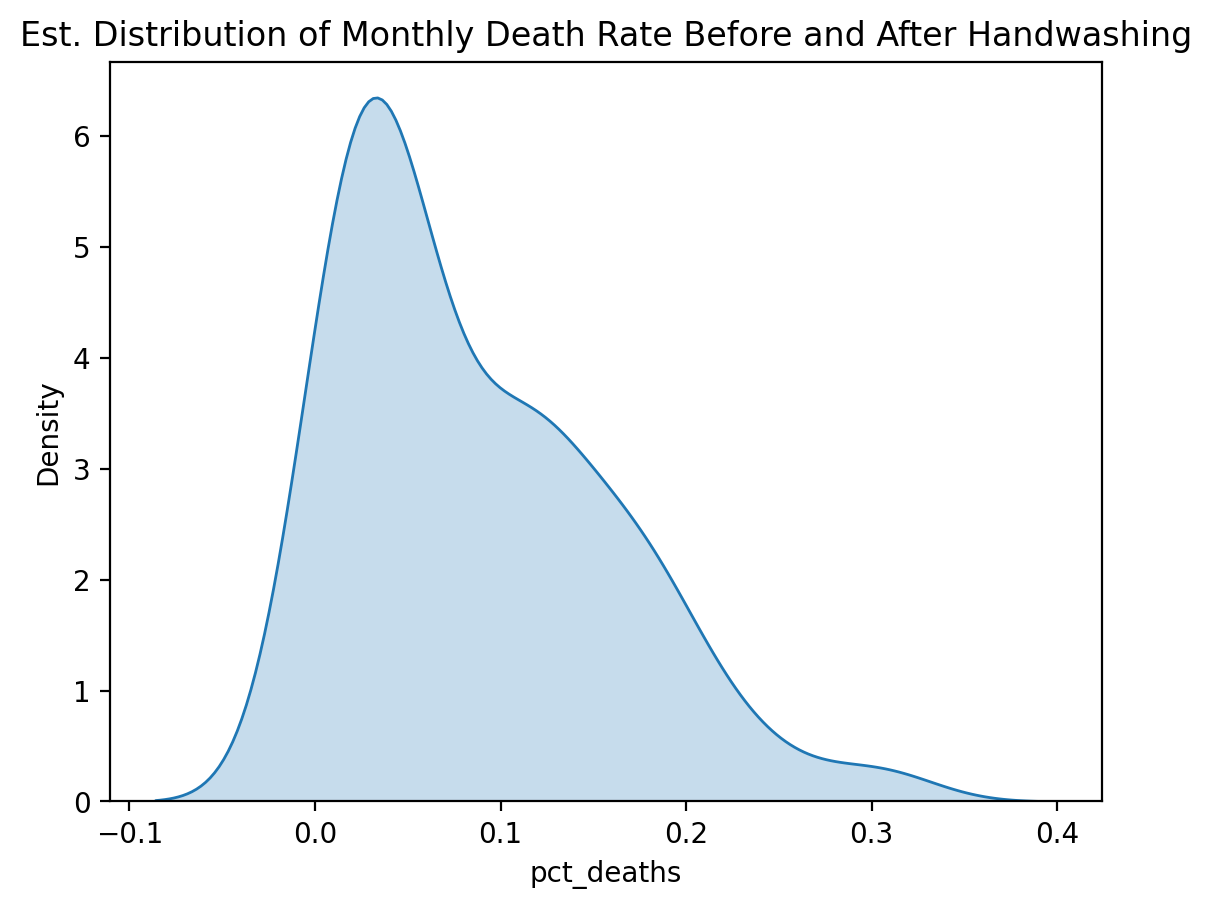

In [58]:
plt.figure(dpi=200)

sns.kdeplot(before_washing.pct_deaths, fill=True)
sns.kdeplot(after_washing.pct_deaths, fill=True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.show()

c:\Users\user\project_directory\pythonProj\Analytics\nevn\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



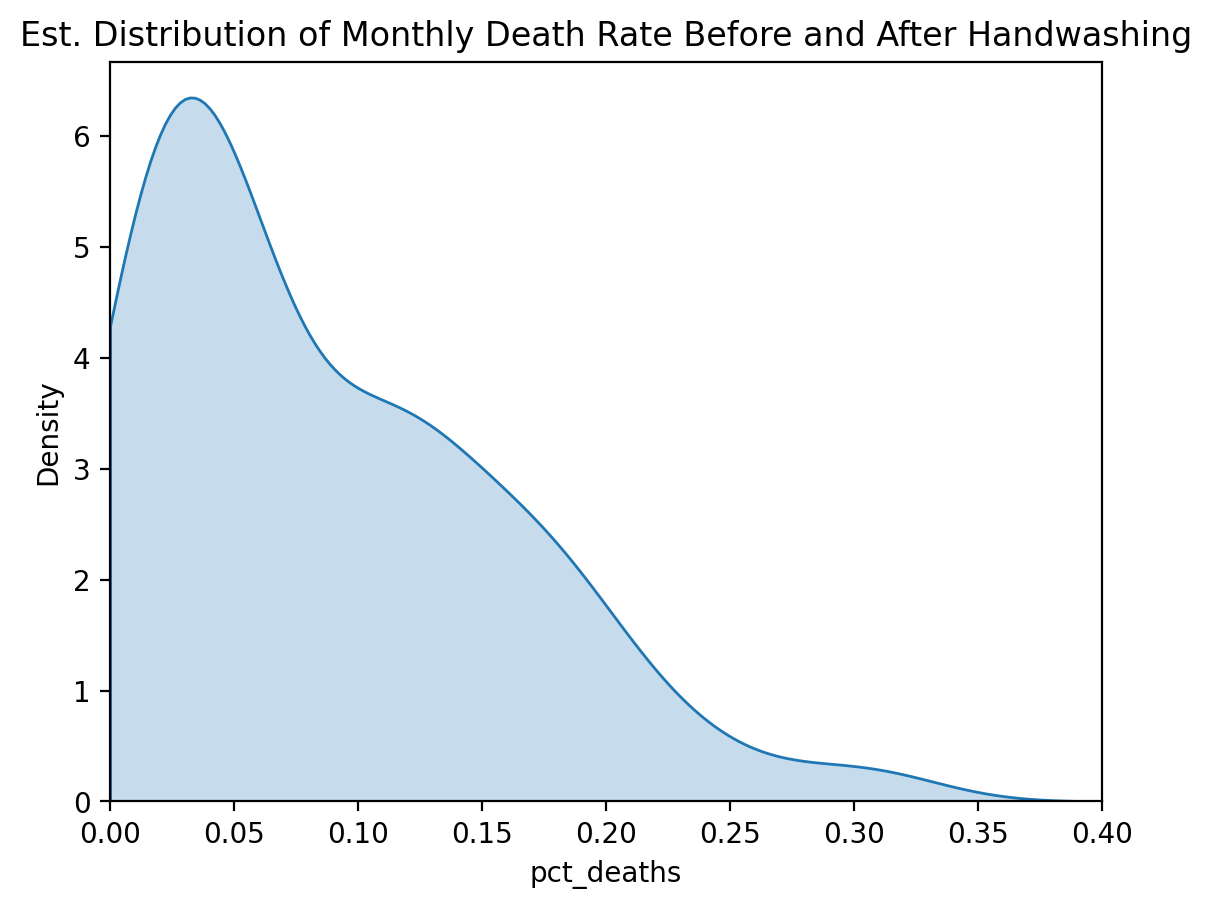

In [59]:
plt.figure(dpi=200)
sns.kdeplot(before_washing.pct_deaths, 
            fill=True,
            clip=(0,1))
sns.kdeplot(after_washing.pct_deaths, 
            fill=True,
            clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()

In [61]:
t_stat, p_value = stats.ttest_ind(a=before_washing.pct_deaths, 
                                  b=after_washing.pct_deaths)

C:\Users\user\AppData\Local\Temp\ipykernel_14412\502658161.py:1: DeprecationWarning:

Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.

